In [1]:
import networkx as nx
import pylab as plt
import statistics
from itertools import chain
from collections import Counter
from operator import itemgetter
import pickle
import json

In [2]:
G = nx.Graph()

In [3]:
G.add_node("Aylin")
G.add_node("Zahra.F.M")
G.add_node("Narges")
G.add_node("Zeynab")
G.add_node("Mahboobeh")
G.add_node("PMR")
G.add_node("Setareh")
G.add_node("Melika")
G.add_node("Maryam.J")
G.add_node("Niayesh")

In [4]:
G.add_edge("Aylin", "Narges")
G.add_edge("Aylin", "Zahra.F.M")
G.add_edge("Zahra.F.M", "Mahboobeh")
G.add_edge("Narges", "Zeynab")
G.add_edge("Aylin", "Mahboobeh")
G.add_edge("Narges", "Zahra.F.M")

G.add_edge("Aylin", "PMR")
G.add_edge("PMR", "Setareh")
G.add_edge("PMR", "Melika")
G.add_edge("PMR", "Maryam.J")
G.add_edge("PMR", "Niayesh")
G.add_edge("Setareh", "Melika")
G.add_edge("Niayesh", "Melika")
G.add_edge("Niayesh", "Setareh")
G.add_edge("Maryam.J", "Setareh")
G.add_edge("Maryam.J", "Melika")
G.add_edge("Maryam.J", "Niayesh")


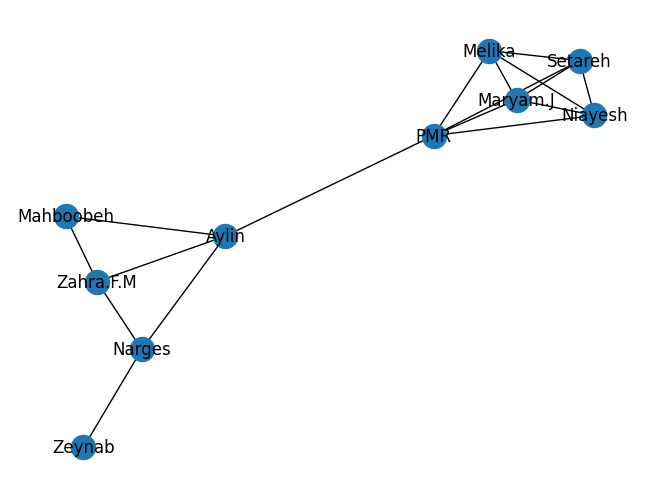

In [5]:
nx.draw(G, with_labels = True)
plt.savefig('dormitory-friendship.png')

In [6]:
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
print(f"The number of nodes in the graph is: {number_of_nodes}")
print(f"The number of edges in the graph is: {number_of_edges}")

The number of nodes in the graph is: 10
The number of edges in the graph is: 17


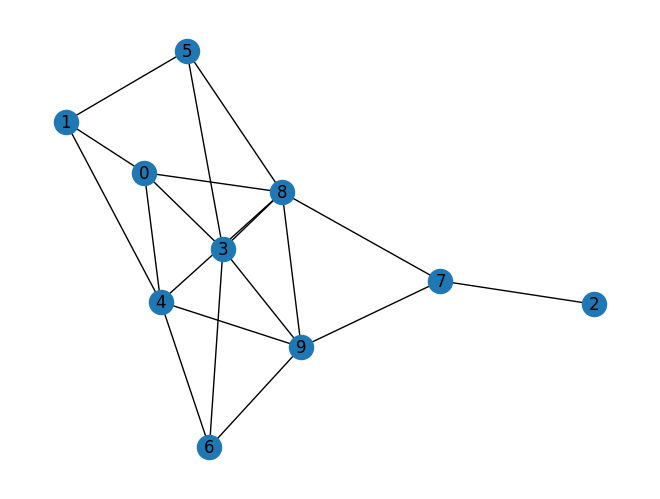

In [7]:
ER = nx.erdos_renyi_graph(10, 0.5)
nx.draw(ER, with_labels=True)
plt.show()

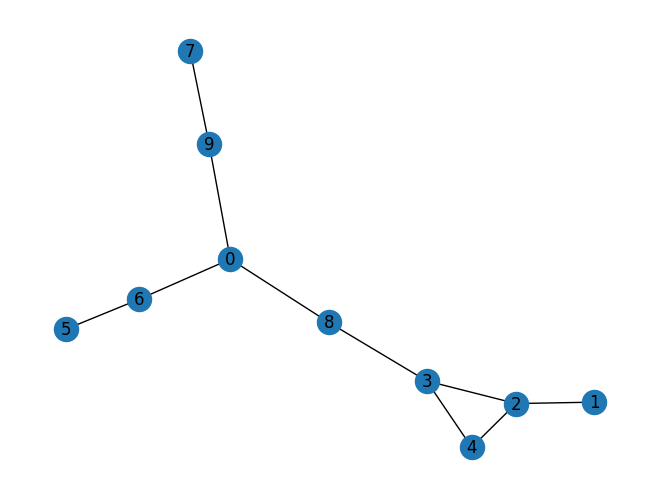

In [8]:
WS = nx.watts_strogatz_graph(10, 3, 0.5)
nx.draw(WS, with_labels=True)
plt.show()

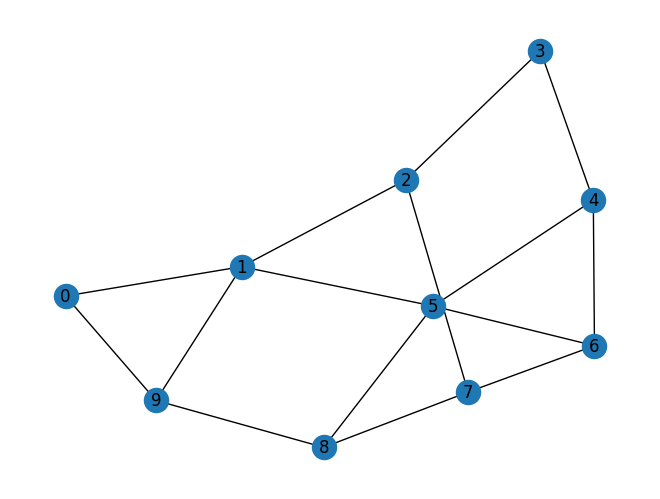

In [9]:
NWS = nx.newman_watts_strogatz_graph(10, 3, 0.5)
nx.draw(NWS, with_labels=True)
plt.show()

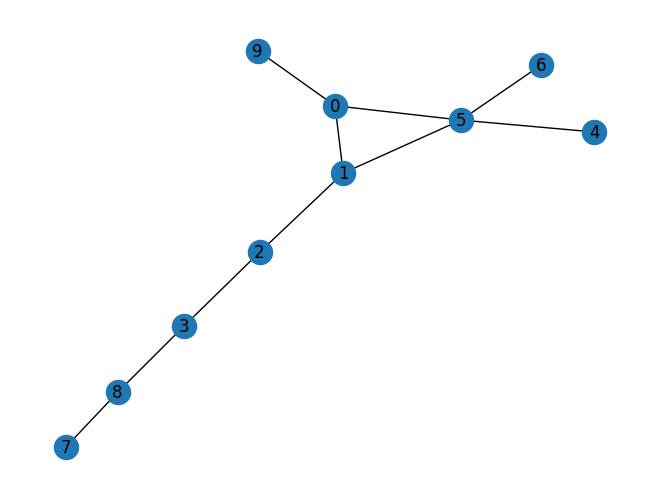

In [10]:
CWS = nx.connected_watts_strogatz_graph(10, 3, 0.5, 5)
nx.draw(CWS, with_labels=True)
plt.show()

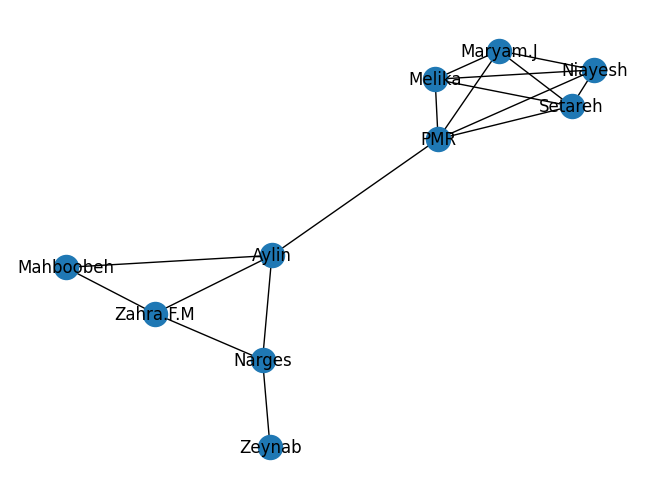

In [11]:
BA = nx.barabasi_albert_graph(10, 2, initial_graph=G)
nx.draw(BA, with_labels=True)
plt.show()

In [13]:
# Fit the models
n = len(G.nodes())
m = len(G.edges())
p = 2 * m / (n * (n - 1))

ER = nx.erdos_renyi_graph(n, p)
WS = nx.watts_strogatz_graph(n, 5, 0.65)
BA = nx.barabasi_albert_graph(n, 5)

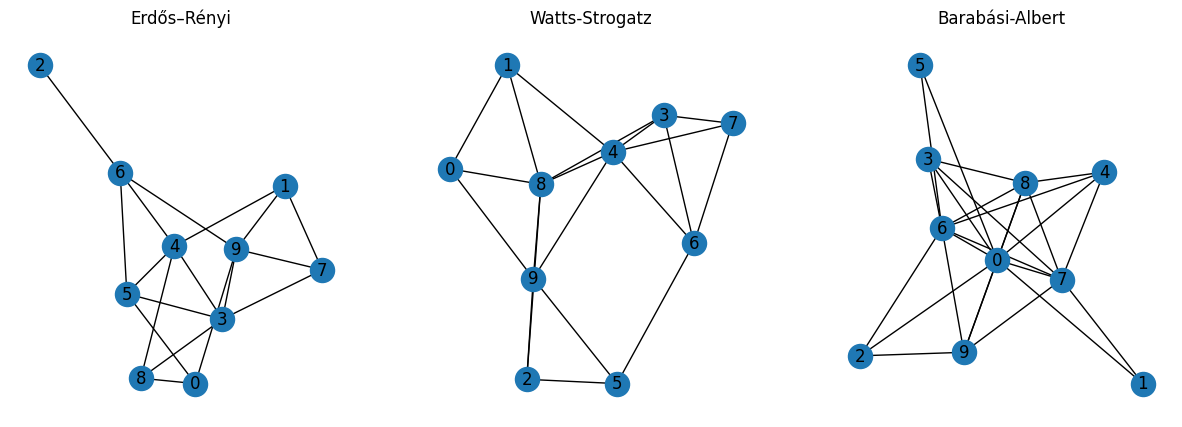

In [14]:

# Plot the graphs
plt.figure(figsize=(15, 5))
plt.subplot(131)
nx.draw(ER, with_labels=True)
plt.title('Erdős–Rényi')

plt.subplot(132)
nx.draw(WS, with_labels=True)
plt.title('Watts-Strogatz')

plt.subplot(133)
nx.draw(BA, with_labels=True)
plt.title('Barabási-Albert')

plt.show()

To decide which model is the best fit for your data, you can compare the macro-level metrics of the real and artificial graphs.

In [15]:
# Compute degree distribution
degrees = [degree for node, degree in G.degree()]
degree_hist = nx.degree_histogram(G)

# Compute average clustering coefficient
avg_clustering = nx.average_clustering(G)

print(f'Degree distribution in the main graph: {degree_hist}')
print(f'Average clustering coefficient in the main graph: {avg_clustering}')

Degree distribution in the main graph: [0, 1, 1, 2, 5, 1]
Average clustering coefficient in the main graph: 0.6933333333333334


In [16]:
# Compute degree distribution
degrees = [degree for node, degree in ER.degree()]
degree_hist = nx.degree_histogram(ER)

# Compute average clustering coefficient
avg_clustering = nx.average_clustering(ER)

print(f'Degree distribution in the ER graph: {degree_hist}')
print(f'Average clustering coefficient in the ER graph: {avg_clustering}')

Degree distribution in the ER graph: [0, 1, 0, 4, 2, 3]
Average clustering coefficient in the ER graph: 0.26333333333333336


In [17]:
# Compute degree distribution
degrees = [degree for node, degree in BA.degree()]
degree_hist = nx.degree_histogram(BA)

# Compute average clustering coefficient
avg_clustering = nx.average_clustering(BA)

print(f'Degree distribution in the BA graph: {degree_hist}')
print(f'Average clustering coefficient in the BA graph: {avg_clustering}')

Degree distribution in the BA graph: [0, 0, 2, 1, 2, 1, 1, 1, 1, 1]
Average clustering coefficient in the BA graph: 0.8199206349206349


In [18]:
# Compute degree distribution
degrees = [degree for node, degree in WS.degree()]
degree_hist = nx.degree_histogram(WS)

# Compute average clustering coefficient
avg_clustering = nx.average_clustering(WS)

print(f'Degree distribution in the WS graph: {degree_hist}')
print(f'Average clustering coefficient in the WS graph: {avg_clustering}')

Degree distribution in the WS graph: [0, 0, 0, 5, 2, 1, 2]
Average clustering coefficient in the WS graph: 0.5700000000000001


In [19]:
graph_transitivity = nx.transitivity(G)
print(f"The transitivity of the G graph is: {graph_transitivity}")

The transitivity of the G graph is: 0.7659574468085106


In [20]:
graph_transitivity = nx.transitivity(ER)
print(f"The transitivity of the ER graph is: {graph_transitivity}")

The transitivity of the ER graph is: 0.2777777777777778


In [21]:
graph_transitivity = nx.transitivity(WS)
print(f"The transitivity of the WS graph is: {graph_transitivity}")

The transitivity of the WS graph is: 0.4925373134328358


In [22]:
graph_transitivity = nx.transitivity(BA)
print(f"The transitivity of the BA graph is: {graph_transitivity}")

The transitivity of the BA graph is: 0.6377952755905512
